# ****About:****
* The data I used is Cyclistic’s Historical Trip Data to analyze and identify trends.

* The previous 12 months data from 2021 March  to 2022 Feb  is used for analysis.

* The data is stored in CSV files. Each file contains one month data. Thus a total of 12 .csv files.

* The data is structured data ie., Organised data.

* The datasets have a different name because Cyclistic is a fictional company. For the purposes of this case study, the datasets are appropriate.**

In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype

import seaborn as sns

import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

#import cufflinks as cf

# Importing Necessary Python Libraries.

In [2]:
mar_21 = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\Cyclistic Data\Cyclistic Data\202103-divvy-tripdata.csv')
apr_21 = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\Cyclistic Data\Cyclistic Data\202104-divvy-tripdata.csv')
may_21 = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\Cyclistic Data\Cyclistic Data\202105-divvy-tripdata.csv')
jun_21 = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\Cyclistic Data\Cyclistic Data\202106-divvy-tripdata.csv')
jul_21 = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\Cyclistic Data\Cyclistic Data\202107-divvy-tripdata.csv')
aug_21 = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\Cyclistic Data\Cyclistic Data\202108-divvy-tripdata.csv')
sep_21 = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\Cyclistic Data\Cyclistic Data\202109-divvy-tripdata.csv')
oct_21 = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\Cyclistic Data\Cyclistic Data\202110-divvy-tripdata.csv')
nov_21 = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\Cyclistic Data\Cyclistic Data\202111-divvy-tripdata.csv')
dec_21 = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\Cyclistic Data\Cyclistic Data\202112-divvy-tripdata.csv')
jan_22 = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\Cyclistic Data\Cyclistic Data\202201-divvy-tripdata.csv')
feb_22 = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\Cyclistic Data\Cyclistic Data\202202-divvy-tripdata.csv')

# Importing 12 CSV files.

In [3]:
df = pd.concat([mar_21,apr_21,may_21,jun_21,jul_21,aug_21,sep_21,oct_21,nov_21,dec_21,jan_22,feb_22], ignore_index=True)

# Joining 12 CSV's into 1 and naming it as "df".

In [4]:
df

# Top 5 & bottom 5 rows of dataframe "df".

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,CFA86D4455AA1030,classic_bike,2021-03-16 08:32:30,2021-03-16 08:36:34,Humboldt Blvd & Armitage Ave,15651,Stave St & Armitage Ave,13266,41.917513,-87.701809,41.917741,-87.691392,casual
1,30D9DC61227D1AF3,classic_bike,2021-03-28 01:26:28,2021-03-28 01:36:55,Humboldt Blvd & Armitage Ave,15651,Central Park Ave & Bloomingdale Ave,18017,41.917513,-87.701809,41.914166,-87.716755,casual
2,846D87A15682A284,classic_bike,2021-03-11 21:17:29,2021-03-11 21:33:53,Shields Ave & 28th Pl,15443,Halsted St & 35th St,TA1308000043,41.842733,-87.635491,41.830661,-87.647172,casual
3,994D05AA75A168F2,classic_bike,2021-03-11 13:26:42,2021-03-11 13:55:41,Winthrop Ave & Lawrence Ave,TA1308000021,Broadway & Sheridan Rd,13323,41.968812,-87.657659,41.952833,-87.649993,casual
4,DF7464FBE92D8308,classic_bike,2021-03-21 09:09:37,2021-03-21 09:27:33,Glenwood Ave & Touhy Ave,525,Chicago Ave & Sheridan Rd,E008,42.012701,-87.666058,42.050491,-87.677821,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5667981,211BE0DC162D85B7,electric_bike,2022-02-23 17:47:49,2022-02-23 18:02:29,NaN,NaN,Leavitt St & Chicago Ave,18058,41.880000,-87.630000,41.895501,-87.682017,member
5667982,D4D53E78000C8CA1,electric_bike,2022-02-04 10:43:47,2022-02-04 10:50:52,NaN,NaN,Leavitt St & Chicago Ave,18058,41.910000,-87.680000,41.895501,-87.682017,member
5667983,9E85F07D2F94492B,electric_bike,2022-02-28 09:16:33,2022-02-28 09:28:11,Wood St & Chicago Ave,637,Canal St & Adams St,13011,41.895714,-87.672210,41.879255,-87.639904,member
5667984,B61B559F81F1D823,electric_bike,2022-02-10 16:55:16,2022-02-10 16:57:53,NaN,NaN,Canal St & Adams St,13011,41.880000,-87.630000,41.879255,-87.639904,member


In [10]:
df.columns

Index(['ride_id', 'bike_type', 'start_time', 'end_time', 'start_station_name',
       'start_station_id', 'end_station_name', 'end_station_id', 'start_lat',
       'start_lng', 'end_lat', 'end_lng', 'user_type', 'ride_length'],
      dtype='object')

# Data Cleaning

In [6]:
df.rename(columns={'rideable_type': 'bike_type','started_at':'start_time','ended_at':'end_time',
                  'member_casual':'user_type'},inplace = True)

df.columns

#Rename Some colunms

Index(['ride_id', 'bike_type', 'start_time', 'end_time', 'start_station_name',
       'start_station_id', 'end_station_name', 'end_station_id', 'start_lat',
       'start_lng', 'end_lat', 'end_lng', 'user_type'],
      dtype='object')

In [7]:
df.shape

(5667986, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5667986 entries, 0 to 5667985
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   bike_type           object 
 2   start_time          object 
 3   end_time            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  user_type           object 
dtypes: float64(4), object(9)
memory usage: 562.2+ MB


In [11]:
df['end_time'] = pd.to_datetime(df['end_time'])
df['start_time'] = pd.to_datetime(df['start_time'])

# Coverting datatype of "started_at" & "ended_at" columns to "datetime64" type.

df['ride_length'] = (df.end_time-df.start_time)/pd.Timedelta(minutes=1)
df['ride_length'] = df['ride_length'].astype('int')

# Creating New Column "ride_length" and changing its datatype to "int32"
# In this column, each row contains the difference between "starting time" and "ending time" columns in minutes.


In [12]:
df = df.drop(['start_station_name','start_station_id','end_station_name','end_station_id','start_lat','start_lng','end_lat','end_lng'],axis=1)

# Deleting Columns which are not relevant for my analysis.

In [13]:
df.sort_values('ride_length')

# Sorting Values by "ride_length" column in Ascending order.

# Its seen that many rows in some months contained negative values. 
# Such errors happened because the "ending time" is earlier than the "starting time" in their respective rows.

,ride_id,bike_type,start_time,end_time,user_type,ride_length
4897810,7CA158F5F050156E,electric_bike,2021-11-07 01:58:08,2021-11-07 01:00:06,casual,-58
4983180,FD8AF7324ABAE9DA,electric_bike,2021-11-07 01:56:51,2021-11-07 01:00:57,casual,-55
4966944,508B09A5FB0737DC,classic_bike,2021-11-07 01:54:50,2021-11-07 01:00:45,member,-54
5123762,7AECC76D1562B51C,classic_bike,2021-11-07 01:54:58,2021-11-07 01:01:29,casual,-53
5101909,6F9E76F5EDAAC1B8,electric_bike,2021-11-07 01:55:42,2021-11-07 01:01:55,member,-53
...,...,...,...,...,...,...
2467300,99415B003B7E7EEE,docked_bike,2021-07-08 19:29:49,2021-08-11 21:56:58,casual,49107
1179072,E6E1E5BFFD72ECEC,docked_bike,2021-06-05 23:33:51,2021-07-12 13:55:14,casual,52701
612047,BDA1217EC8532C7B,docked_bike,2021-05-02 02:56:07,2021-06-08 13:37:43,casual,53921
1642835,7F0578ABF030FC83,docked_bike,2021-06-04 22:03:33,2021-07-13 14:15:14,casual,55691


In [14]:
df.drop(df[df['ride_length']<1].index,inplace = True)


# Removing 80845 rows containing negative values & ride length less than 1 minute. 
# Any trips that were below 60 seconds in length are potentially false starts or users trying to re-dock a bike to ensure it was secure.

<AxesSubplot:xlabel='user_type', ylabel='ride_length'>

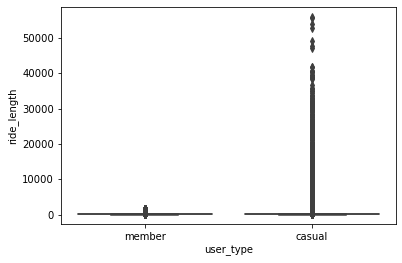

In [15]:
sns.boxplot(data = df, x ='user_type', y = 'ride_length', order = ['member', 'casual'])

# Boxplot of column "Ride Length" to see the distribution of data between Member and Casual Rider.

* Its seen that casual riders use bikes for **more duration** (might be returning bikes after days) than members.

In [16]:
df.isna().sum()
# Checking if Dataframe "df" contains any missing values.

ride_id        0
bike_type      0
start_time     0
end_time       0
user_type      0
ride_length    0
dtype: int64

In [17]:
df.duplicated().sum()
#Checking if Dataframe "df" contains any duplicate values.


0

In [18]:
df['ride_id'] = df['ride_id'].str.strip()
# Removing leading and trailing whitespaces in column "Ride Id".

df.duplicated(subset=['ride_id']).sum()
# View any duplicate rows.

0

In [19]:
df['Year'] = pd.to_datetime(df['start_time']).dt.year

cats1 = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['Month'] = pd.to_datetime(df['start_time']).dt.month_name()
df['Month'] = df['Month'].astype(CategoricalDtype(categories=cats1, ordered=False))

cats2 = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df['Day_of_week'] = df['start_time'].dt.day_name()
df['Day_of_week'] = df['Day_of_week'].astype(CategoricalDtype(categories=cats2, ordered=False))


df['Hour'] = df['start_time'].dt.hour

# Creating new columns "year", "month", "day_of_week", "hour" and Converting datatypes.

In [20]:
df = df.astype({'ride_id' : 'string', 'bike_type' : 'category', 'user_type' : 'category','Month' : 'category', 'Day_of_week' : 'category' })

# Coverting datatypes of each columns.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5580736 entries, 0 to 5667985
Data columns (total 10 columns):
 #   Column       Dtype         
---  ------       -----         
 0   ride_id      string        
 1   bike_type    category      
 2   start_time   datetime64[ns]
 3   end_time     datetime64[ns]
 4   user_type    category      
 5   ride_length  int32         
 6   Year         int64         
 7   Month        category      
 8   Day_of_week  category      
 9   Hour         int64         
dtypes: category(4), datetime64[ns](2), int32(1), int64(2), string(1)
memory usage: 298.0 MB


# Data Analyzing & Visualization

# No. of Rides in 1 year

In [22]:
pd.pivot_table(df,
              index = 'user_type',
              values = 'ride_id',
              aggfunc = ['count'],
              margins = True,
              margins_name = 'Total Count')

,count
,ride_id
user_type,
casual,2506221
member,3074515
Total Count,5580736


In [23]:
fig_1 = df.groupby('user_type', as_index=False).count()

px.bar(fig_1, y = 'user_type', x = 'ride_id', range_x = [0,000000],
        color = 'user_type', 
        height = 300,
        text = 'ride_id', 
        labels = {'ride_id': 'No. of Rides', 'user_type': 'Member/Casual'},
        hover_name = 'user_type', hover_data = {'user_type': False, 'Month': False, 'ride_id': True}, 
        color_discrete_map = {'casual': '#FF934F', 'member': '#058ED9'})

# Number of Rides in Each Month

In [24]:
pv2 = pd.pivot_table(df,index =['Year','Month','user_type'],
              values = 'ride_id',
              aggfunc = ['count'],
              margins = True,
              margins_name = 'Total_Count')
pv2 = pv2.loc[(pv2 !=0).any(axis=1)]
pv2

count
                                 ride_id
Year        Month     user_type         
2021        March     casual       83148
                      member      142375
            April     casual      134945
                      member      197477
            May       casual      253346
                      member      269897
            June      casual      365023
                      member      352676
            July      casual      435927
                      member      373833
            August    casual      407517
                      member      385426
            September casual      359226
                      member      385959
            October   casual      253829
                      member      367460
            November  casual      105373
                      member      248699
            December  casual       68752
                      member      174878
2022        January   casual       18154
                      member       83765
            February  casual       20981
                      member       92070
Total_Count                      5580736

In [25]:
fig_2 = df.groupby(['Year', 'Month', 'user_type'], as_index=False).count()
fig_2 = fig_2[fig_2['ride_length'] != 0]

px.line(fig_2, x = 'Month', y = 'ride_id', range_y = [0,450000],
        color = 'user_type', 
        line_shape = 'spline',
        markers=True, 
        labels = {'ride_id': 'No_of_rides', 'Month': 'Months (Mar 2021 - Feb 2022)', 'user_type': 'Member/Casual'},
        hover_name = 'user_type', hover_data = {'user_type': False, 'Month': True, 'ride_id': True}, 
        color_discrete_map = {'casual': '#FF934F', 'member': '#058ED9'})

* It shows that the total number of rides fall during Nov - Mar and rise during May-Oct, and peak at Jul-Aug.
* The behaviour of casual riders and members tend to be the same as the season changes.
* Maximum riders are using bikes in Jul - Aug.
* Casual riders overtake members during Jul.

# Number of Rides in Each Weekday

In [26]:
pd.pivot_table(df,
        index= ['Day_of_week', 'user_type'],
        values= 'ride_id',
        aggfunc = ['count'],
        margins = True)

count
                       ride_id
Day_of_week user_type         
Sunday      casual      476940
            member      376813
Monday      casual      286632
            member      425633
Tuesday     casual      272952
            member      471632
Wednesday   casual      276911
            member      478751
Thursday    casual      283300
            member      451893
Friday      casual      359920
            member      442933
Saturday    casual      549566
            member      426860
All                    5580736

In [27]:
fig_3 = df.groupby(['Day_of_week', 'user_type'],as_index=False).count()

px.line(fig_3, x='Day_of_week', y='ride_id',range_y = [0,45000],
       color = 'user_type',line_shape = 'spline',
        markers=True, 
        labels = {'ride_id': 'No. of Rides', 'user_type': 'Member/Casual', 'bike_type' : 'Bike Type'},
        hover_name = 'user_type', hover_data = {'user_type': False, 'ride_length': False}, 
        color_discrete_map = {'casual': '#FF934F', 'member': '#058ED9'})
       

* Here it shows more casual riders are using bike share on Weekends (ie., Saturdays and Sundays).
* But there are a fixed number of casual riders using on Weekdays, might be commuting.
* While the number of members riding tend to be same almost daily.

# Number of Rides in Each Hour

In [28]:
pd.pivot_table(df,index = ['Hour','user_type'],
              values = 'ride_id',
              aggfunc =['count'],
              margins = True,
              margins_name = 'Total_count')

count
                       ride_id
Hour        user_type         
0           casual       53438
            member       33061
1           casual       39034
            member       21947
2           casual       25502
            member       12557
3           casual       14011
            member        7202
4           casual        9856
            member        8285
5           casual       12510
            member       30700
6           casual       25684
            member       82135
7           casual       46640
            member      151736
8           casual       63369
            member      176135
9           casual       75547
            member      131904
10          casual      103781
            member      128945
11          casual      134561
            member      154917
12          casual      160173
            member      180386
13          casual      171384
            member      177041
14          casual      176532
            member      173784
15          casual      186759
            member      201204
16          casual      203386
            member      259300
17          casual      234541
            member      321959
18          casual      211913
            member      271243
19          casual      164801
            member      194350
20          casual      120941
            member      131537
21          casual      103050
            member       97833
22          casual       95427
            member       74802
23          casual       73381
            member       51552
Total_count            5580736

In [29]:
fig_4 =  df.groupby(['Hour', 'user_type'],as_index=False).count()

px.line(fig_4, x = 'Hour',y = 'ride_id',color = 'user_type',
       line_shape='spline', markers =True, 
        labels = {'ride_id': 'No. of Rides', 'user_type': 'Member/Casual', 'bike_type' : 'Bike Type'},
        hover_name = 'user_type', hover_data = {'user_type': False, 'ride_length': False}, 
        color_discrete_map = {'casual': '#FF934F', 'member': '#058ED9'})

* In a day, casual riders and members use bike share more during afternoon, peak use during evening.
* While in the morning time, the number of casual riders are way less than the members.

# Average Ride Length in 1 Year

In [30]:
pd.pivot_table(df,
               index = 'user_type',
               values = ['ride_length'],
               aggfunc = ['mean'],
               margins = True,
               margins_name = 'Total Ride Average')

,mean
,ride_length
user_type,
casual,31.863382
member,13.218548
Total Ride Average,21.591650


In [31]:
fig_5 = df.groupby([ 'user_type'],as_index=False).mean()

px.bar (fig_5, y='user_type',x='ride_length',color = 'user_type',range_x = [0,35],
       text = 'ride_length',height=300,
       labels = {'ride_length': 'Average Ride Length (Min)', 'user_type': 'Member/Casual'},
       color_discrete_map = {'casual': '#FF934F', 'member': '#058ED9'},
       hover_name = 'user_type', hover_data = {'user_type': False, 'ride_length': True})

* The average ride length of casual riders are more than twice of members.

# Average Ride Length in Each Month

In [32]:
pd.pivot_table(df, index = ['Year','Month','user_type'],
              values = ['ride_length'],
              aggfunc = ['mean'],
              margins = True,
              margins_name = 'Avg Ride Length')

mean
                                    ride_length
Year            Month     user_type            
2021            March     casual      38.069527
                          member      13.677619
                April     casual      37.993864
                          member      14.425999
                May       casual      38.273622
                          member      14.402698
                June      casual      37.199996
                          member      14.439262
                July      casual      32.753615
                          member      13.989878
                August    casual      28.654314
                          member      13.832834
                September casual      27.680354
                          member      13.461233
                October   casual      28.562847
                          member      12.226259
                November  casual      22.971710
                          member      11.007740
                December  casual      23.335321
                          member      10.691253
2022            January   casual      30.490305
                          member      11.694276
                February  casual      26.762785
                          member      11.170164
Avg Ride Length                       21.591650

In [33]:
fig_6 = round(df.groupby(['Month', 'user_type'],as_index =False).mean(),2)

px.bar(fig_6, x='Month', y = 'ride_length',color = 'user_type',barmode ='group',
      range_y = [0,50],
      text ='ride_length', 
        labels = {'ride_length': 'Avg ride length(Min)', 'user_type': 'Member/Casual', 'bike_type' : 'Bike Type'},
        hover_name = 'user_type', hover_data = {'user_type': False, 'ride_length': False}, 
        color_discrete_map = {'casual': '#FF934F', 'member': '#058ED9'})

* Average ride length of casual riders are more than twice than members in all months.

# Average Ride Length in each WeekDay

In [34]:
pd.pivot_table(df,index = ['Day_of_week', 'user_type'],
              values = 'ride_length',
              aggfunc = ['mean'],
              margins = True,
               margins_name = 'Total Ride Average')

mean
                             ride_length
Day_of_week        user_type            
Sunday             casual      37.525966
                   member      15.283560
Monday             casual      31.746553
                   member      12.775823
Tuesday            casual      27.732066
                   member      12.385449
Wednesday          casual      27.563293
                   member      12.365641
Thursday           casual      27.720219
                   member      12.381112
Friday             casual      30.092507
                   member      12.945972
Saturday           casual      34.524205
                   member      14.883557
Total Ride Average             21.591650

In [35]:
fig_7 = round(df.groupby(['Day_of_week', 'user_type'],as_index =False).mean(),2)

px.bar(fig_7,x='Day_of_week',y = 'ride_length', color= 'user_type',
      barmode='group',range_y = [0,50],
      text = 'ride_length', 
      labels = {'ride_length': 'Avg length 0f Rides(Min)', 'user_type': 'Member/Casual', 'bike_type' : 'Bike Type'},
        hover_name = 'user_type', hover_data = {'user_type': False, 'ride_length': False}, 
        color_discrete_map = {'casual': '#FF934F', 'member': '#058ED9'})

* In Weekends casual riders' ride length is maximum when compared to Weekdays.
* Members' ride length tend to be almost same in all Weekdays and marginally higher in Weekends.
* Both Casual riders and Members use bikes for long rides during Weekends.

# Bike Type Usage Between Casual riders and Members

In [36]:
pd.pivot_table(df,
               index = ['bike_type', 'user_type'],
               values = ['ride_id'],
               aggfunc = ['count'],
               margins = True,
               margins_name = 'Total Rides')

count
                         ride_id
bike_type     user_type         
classic_bike  casual     1254496
              member     1971782
docked_bike   casual      309359
              member           0
electric_bike casual      942366
              member     1102733
Total Rides              5580736

In [37]:
fig_8 = df.groupby(['bike_type', 'user_type'],as_index = False).count()
px.bar( fig_8, x='bike_type' , y = 'ride_id',color = 'user_type',range_y = [0,3000000],
       barmode = 'group'  , text = 'ride_id', 
        labels = {'ride_id': 'No. of Rides', 'user_type': 'Member/Casual', 'bike_type' : 'Bike Type'},
        hover_name = 'user_type', hover_data = {'user_type': False, 'ride_length': False}, 
        color_discrete_map = {'casual': '#FF934F', 'member': '#058ED9'})


# Conclusion
* Annual members and Casual riders use Cyclistic bike share differently.

* The average ride length of causual riders are more than twice as of members.

* From the average ride length difference, we can conclude that Annual members usually use bike share for daily commuting, while casual riders mostly use bike share for leisure rides mostly during Weekends.

* But there are a fixed number of casual riders who use bike share for commuting.

# Additional Data to expand the findings
* If the personally identifiable information and financial information were available, I could have calculated whether the casual riders had spent more money than if they opt for taking annual memberships.

# Recommendations
* A **new Annual Membership package for Weekend usage only** will attract current Weekend casual riders.

* **Promotions** aiming at **current Weekday casual riders** must be implemented as soon as possible. Those promtions must include the financial savings of taking membership when compared to single passes and full day passes for a year long period.

* A **Loyalty Program** for casual riders can be implemented, where **occasional membership fees discounts** must be given to casual riders with **high loyalty points**.